In [3]:
from skimage.filters import threshold_otsu, threshold_yen

data_folder = '../data/banana/'

In [4]:
import os

# get a list of files in that folder
file_list = os.listdir(data_folder)

# filter the list so that only tif images remain
image_file_list = [file for file in file_list if file.endswith(".tif")]
image_file_list

['banana0002.tif',
 'banana0003.tif',
 'banana0004.tif',
 'banana0005.tif',
 'banana0006.tif',
 'banana0007.tif',
 'banana0008.tif',
 'banana0009.tif',
 'banana0010.tif',
 'banana0011.tif',
 'banana0012.tif',
 'banana0013.tif',
 'banana0014.tif',
 'banana0015.tif',
 'banana0016.tif',
 'banana0017.tif',
 'banana0018.tif',
 'banana0019.tif',
 'banana0020.tif',
 'banana0021.tif',
 'banana0022.tif',
 'banana0023.tif',
 'banana0024.tif',
 'banana0025.tif',
 'banana0026.tif']

In [5]:
def process_image(filename, threshold_function):
    """
    Process a given image file name 
    """
    
    # load data
    from skimage.io import imread
    image = imread(filename)
    
    # segment it
    binary_image = image > threshold_function(image)
    
    from skimage.measure import label
    labels = label(binary_image)
    
    # measure radius
    from skimage.measure import regionprops
    statistics = regionprops(labels)
    areas = [s.area for s in statistics]
     
    import numpy as np
    return np.max(areas)

process_image('../data/banana/banana0026.tif', threshold_otsu)

840

In [8]:
slice_areas1 = [process_image(data_folder + file, threshold_otsu) for file in image_file_list]
print(slice_areas1)

[1302, 3072, 5127, 6486, 7208, 7540, 7689, 7761, 7800, 7767, 7793, 7812, 7908, 8145, 8367, 8581, 8744, 8989, 9010, 8618, 7682, 6012, 3846, 1468, 840]


In [9]:
slice_areas2 = [process_image(data_folder + file, threshold_yen) for file in image_file_list]
print(slice_areas2)

[1833, 4199, 6074, 7312, 8012, 8379, 8473, 8461, 8382, 8307, 8257, 8300, 8442, 8681, 8967, 9247, 9592, 9880, 9976, 9757, 8886, 7468, 5478, 2203, 1255]


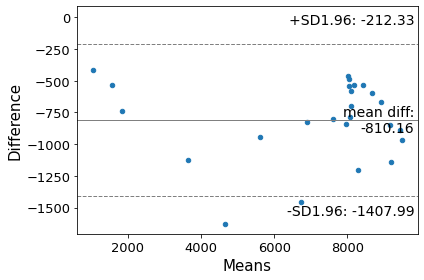

In [10]:
import numpy as np
from statsmodels.graphics.agreement import mean_diff_plot

m1 = np.asarray(slice_areas1)
m2 = np.asarray(slice_areas2)

plot = mean_diff_plot(m1, m2)